In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

num_samples = 500
num_time_steps = 3
height, width, channels = 64, 64, 1

X = np.random.rand(num_samples, num_time_steps, height, width, channels)
Y = np.random.rand(num_samples, height, width, channels)

2023-07-26 15:58:03.768262: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 15:58:03.820531: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 15:58:03.821362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 15:58:04.687101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


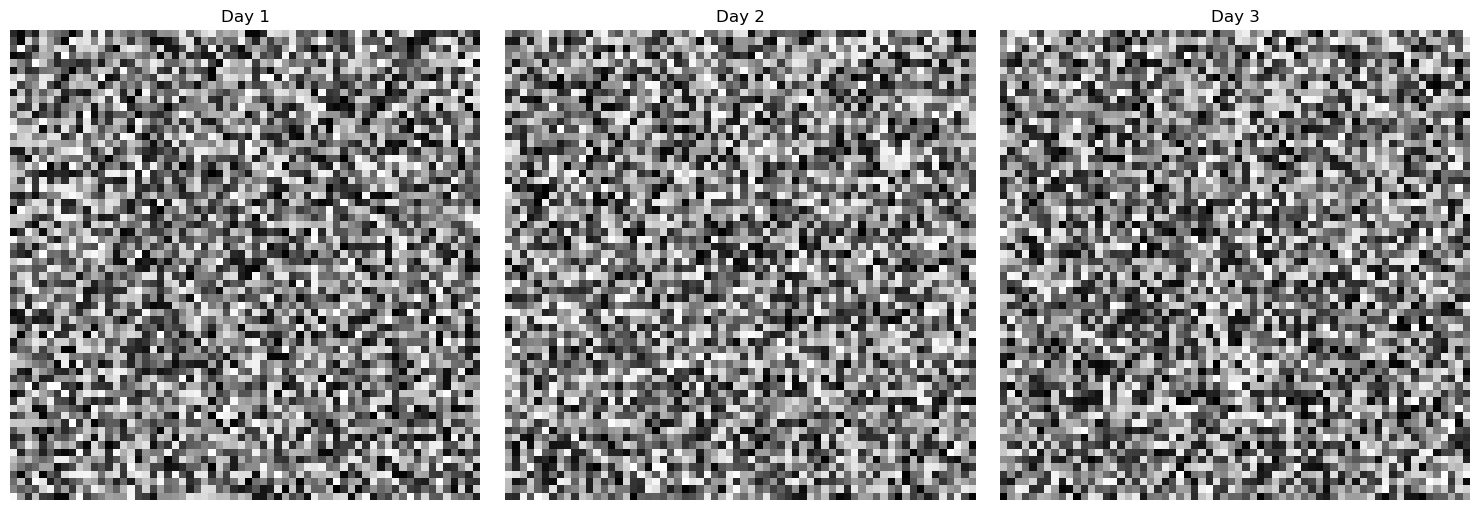

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, num_time_steps, figsize=(15, 5))

for i in range(num_time_steps):
    ax = axes[i]
    ax.imshow(X[10][i].squeeze(), cmap='gray')
    ax.set_title(f"Day {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [5]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv2D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv2D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

input_img = layers.Input(shape=(num_time_steps, height, width, channels))
patch_size = 8
patches = layers.Reshape((num_time_steps, height * width // (patch_size ** 2), patch_size * patch_size * channels))(input_img)
x = patches
for _ in range(2):
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=1024, dropout=0.1)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(height * width * channels, activation='sigmoid')(x)
output_img = layers.Reshape((height, width, channels))(x)

model = tf.keras.Model(input_img, output_img)
model.compile(optimizer='adam', loss='mse')

model.fit(X, Y, epochs=10, batch_size=32)

Epoch 1/10
16/16 [==============================] - 10s 456ms/step - loss: 0.0834
Epoch 2/10
16/16 [==============================] - 7s 458ms/step - loss: 0.0833
Epoch 3/10
16/16 [==============================] - 7s 458ms/step - loss: 0.0832
Epoch 4/10
16/16 [==============================] - 7s 461ms/step - loss: 0.0831
Epoch 5/10
16/16 [==============================] - 7s 459ms/step - loss: 0.0830
Epoch 6/10
16/16 [==============================] - 7s 457ms/step - loss: 0.0827
Epoch 7/10
16/16 [==============================] - 7s 452ms/step - loss: 0.0823
Epoch 8/10
16/16 [==============================] - 7s 451ms/step - loss: 0.0818
Epoch 9/10
16/16 [==============================] - 7s 449ms/step - loss: 0.0814
Epoch 10/10
16/16 [==============================] - 7s 449ms/step - loss: 0.0810


1/1 [==============================] - 0s 26ms/step


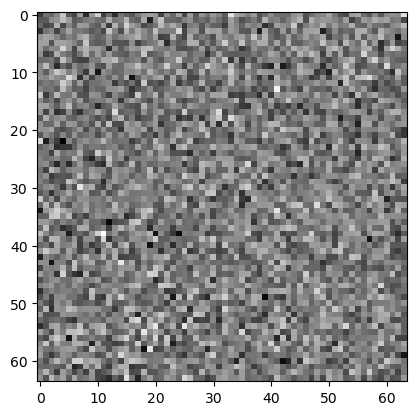

<Figure size 640x480 with 0 Axes>

In [14]:
index = 10

input_images = X[index]

input_images = np.expand_dims(input_images, axis=0)

predicted_image = model.predict(input_images)

plt.imshow(predicted_image[0,:,:,0], cmap='gray')
plt.show()

In [15]:
for i in range(num_time_steps):
    ax = axes[i]
    ax.imshow(X[index][i].squeeze(), cmap='gray')
    ax.set_title(f"Day {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>